In [1]:
import tools as tools
import preprocessing.preprocess as preprocess
import model.logistic_regression as LR
import model.decision_tree as DT
import model.random_forest as RF
import model.support_vector_machine as SVC
import model.naive_bayesian_classifier as NB

import pandas as pd


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gisellemartel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gisellemartel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
print("\nPreprocessing of data...\n")

# read dataset from csv files
fake_news = preprocess.parse_dataset("Fake.csv", "FAKE")
real_news = preprocess.parse_dataset("True.csv", "REAL")

print()

# join all news (fake + real) data
all_news = pd.concat([fake_news, real_news], axis=0)

# tokenize each dataset
fake_news_all_tokens, fake_news_tokens_per_article = preprocess.tokenize(fake_news, "fake_news")
real_news_all_tokens, real_news_tokens_per_article = preprocess.tokenize(real_news, "real_news")

print()

# join tokens (fake + real)
all_tokens = fake_news_all_tokens + real_news_all_tokens
tokens_per_article = fake_news_tokens_per_article + real_news_tokens_per_article

print()

# Split and preprocess the data into training and testing data
X_train, X_test, y_train, y_test = preprocess.split_and_preprocess(all_tokens,tokens_per_article, all_news)

%store X_train
%store X_test
%store y_train
%store y_test


Preprocessing of data...

Parsing news dataset from file: Fake.csv
Setting label for news dataset: FAKE
Parsing news dataset from file: True.csv
Setting label for news dataset: REAL

Tokenizing fake_news dataset, this may take a few minutes...
Tokenizing real_news dataset, this may take a few minutes...


Splitting data: 70% training, 30% testing
Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'y_train' (DataFrame)
Stored 'y_test' (DataFrame)



Testing Logistic Regression Classifier ...

mean squared error: 14.06%
accuracy: 98.02%
recall: 97.70%
precision: 98.51%
f1: 98.10%
jacccard: 96.28%


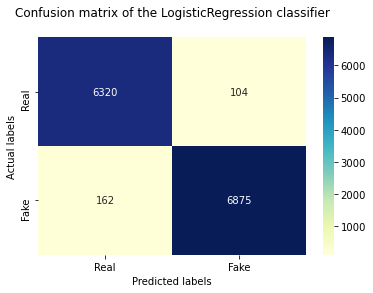

In [3]:
# Logisitic Regression Classifier
print("\nTesting Logistic Regression Classifier ...\n")

model = LR.logistic_regression_train(X_train, y_train)
y_pred = LR.logistic_regression_predict(model, X_test)

tools.display_prediction_scores(y_test,y_pred)
tools.plot_confusion_matrix(y_test,y_pred,"LogisticRegression")



Testing Decision Tree Classifier ...

mean squared error: 8.79%
accuracy: 99.23%
recall: 99.49%
precision: 99.04%
f1: 99.26%
jacccard: 98.54%


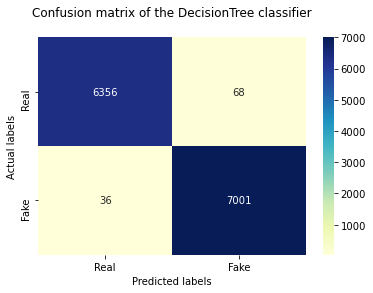

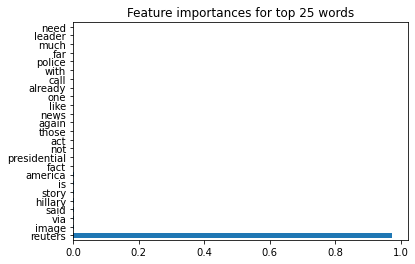

In [4]:
# Decision Tree Classifier
print("\nTesting Decision Tree Classifier ...\n")

model = DT.decision_tree_train(X_train, y_train)
y_pred = DT.decision_tree_predict(model, X_test)

tools.display_prediction_scores(y_test,y_pred)
tools.plot_confusion_matrix(y_test,y_pred,"DecisionTree")
tools.plot_feature_importances(X_train, model, "DecisionTree")

In [5]:
# Random Forest Classifer


Testing SVM Classifier ...

Fitting data to SVC, this may take a while...
mean squared error: 10.90%
accuracy: 98.81%
recall: 98.68%
precision: 99.04%
f1: 98.86%
jacccard: 97.75%


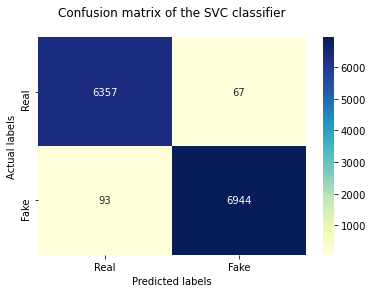

In [6]:
# Support Vector Classification
print("\nTesting SVM Classifier ...\n")

model = SVC.support_vector_machine_train(X_train, y_train)
y_pred = SVC.support_vector_machine_predict(model, X_test)

tools.display_prediction_scores(y_test,y_pred)
tools.plot_confusion_matrix(y_test,y_pred,"SVC")



In [7]:
# Naive Bayes Classifier
print("\nTesting Naive Bayesian Classifier ...\n")

model = NB.naive_bayesian_train(X_train, y_train)
y_pred = NB.naive_bayesian_predict(model, X_test)

tools.display_prediction_scores(y_test,y_pred)
tools.plot_confusion_matrix(y_test,y_pred,"NaiveBayes")




Testing Naive Bayesian Classifier ...



NameError: name 'X_train' is not defined

This part may take a while...
Performing GridSearch with 200 estimators at depth value: 50
Performing GridSearch with 200 estimators at depth value: 60
Performing GridSearch with 200 estimators at depth value: 70

Random Forest Accuracy is: 0.9972513186241735
Random Forest Mean Squared Error is: 0.05242786831282063



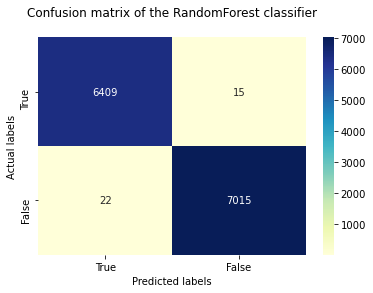

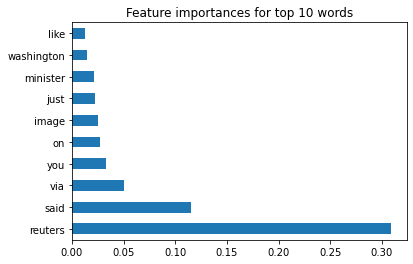

In [4]:
RF.Random_Forest(X_train, X_test, y_train, y_test)

Fitting data to SVC, this may take a while...
SVC Accuracy is: 0.9881138102666964
Random Forest Mean Squared Error is: 0.10902380351695504


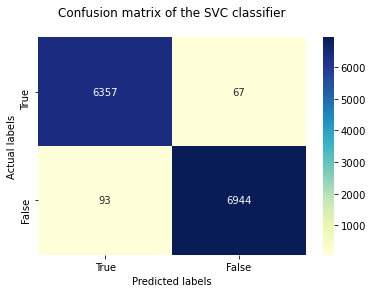

In [5]:
SVC.support_vector_machine(X_train, X_test, y_train, y_test)